# Heart disease: what is my status? 

In [1]:
#Heart Failure Prediction Dataset

Heart disease is the leading cause of death in the United States. In fact, Heart failure is a common event caused by Cardiovascular diseases (CVDs)  which account for 31% of all deaths worldwide.  Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. 
 
My mom came to hear more about heart diseases. Her doctor said that she has a high risk of getting a heart attack because the exam showed that some values of the factors such as blood pressure, cholesterol, blood sugar are not good. 
 
Then she said: I thought you were studying data, this is my exam result (.........), can you tell me what your models say?  Do I potentially subject to heart risk?  What are the common factors that characterize people with and without heart diseases? 
 
In fact, People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
The next presentation tries to answer Mom's question based on the Heart Failure Prediction Dataset taken from kaggle.

Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
#import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# library for modeling 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [5]:
data.shape

(918, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
# categorical versus numerical feature

In [10]:
# get the non munerical features
non_numerical=[f for f in data.columns if data[f].dtype=='O']
non_numerical

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [11]:
# unique values of non numerical column
for column in data[non_numerical].columns:
    print(f'The unique values in column "{column}" are: {data[non_numerical][column].unique()} \n')

The unique values in column "Sex" are: ['M' 'F'] 

The unique values in column "ChestPainType" are: ['ATA' 'NAP' 'ASY' 'TA'] 

The unique values in column "RestingECG" are: ['Normal' 'ST' 'LVH'] 

The unique values in column "ExerciseAngina" are: ['N' 'Y'] 

The unique values in column "ST_Slope" are: ['Up' 'Flat' 'Down'] 



In [12]:
# get all numerical column
numerical=[f for f in data.columns if data[f].dtype!='O']
numerical

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

## Qualitative Analysis

#count or frequency in each groupe 

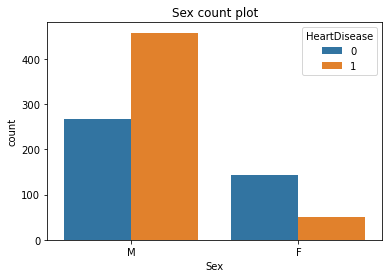

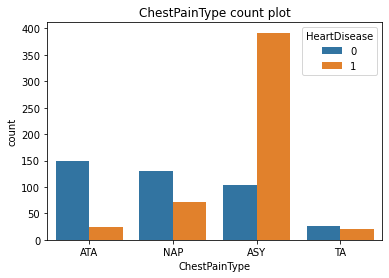

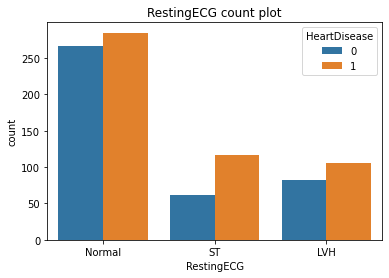

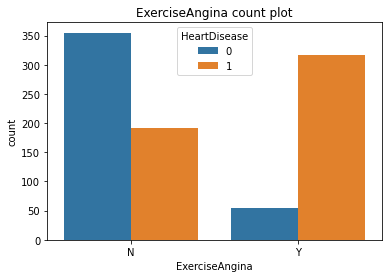

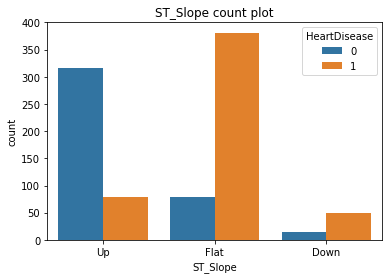

In [13]:

for f in non_numerical:
    sns.countplot(x=f,data=data, hue=data['HeartDisease'])
    plt.title(f+' count plot')
    plt.show()

#### percentage in each groupe

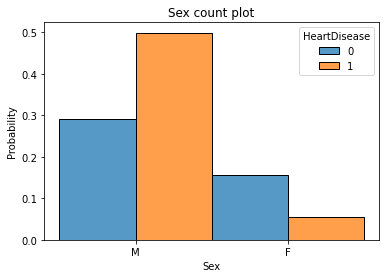

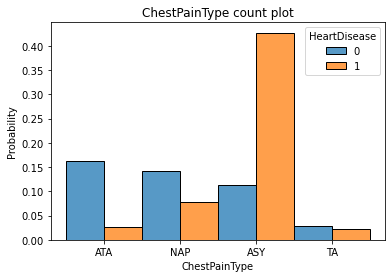

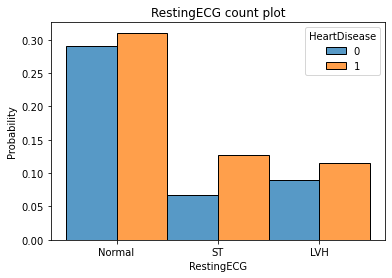

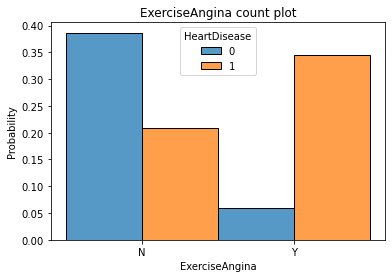

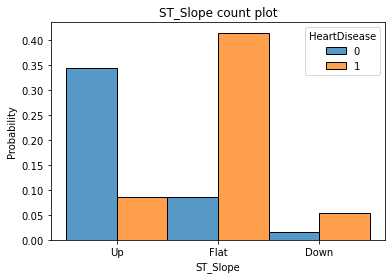

In [14]:
for f in non_numerical:
    sns.histplot(x=f,data=data, hue=data['HeartDisease'], stat="probability", multiple="dodge")
    #sns.countplot(x=f,data=data, hue=data['HeartDisease'])
    plt.title(f+' count plot')
    plt.show()

## Univariete analysis- Proportion in each group (pie chart)

Text(0.5, 1.0, 'Distribution of RestingECG')

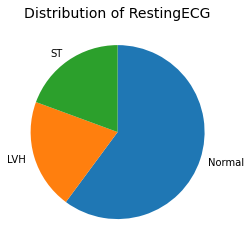

In [15]:
RestingECG = data['RestingECG'].value_counts()
plt.pie(RestingECG ,labels = RestingECG.index, startangle = 90,counterclock = False);
plt.title("Distribution of RestingECG", size = 14)

Text(0.5, 1.0, 'gender ')

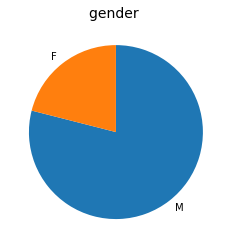

In [16]:
Sex = data['Sex'].value_counts()
plt.pie(Sex , labels = Sex.index, startangle = 90,counterclock = False);
plt.title("gender ", size = 14)

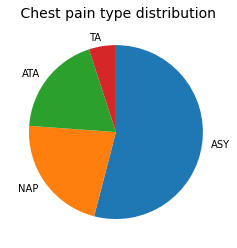

In [17]:
ChestPainType = data['ChestPainType'].value_counts()
plt.pie(ChestPainType ,labels = ChestPainType.index, startangle = 90,counterclock = False);
plt.title(" Chest pain type distribution", size = 14);

Text(0.5, 1.0, 'ExerciseAngina ')

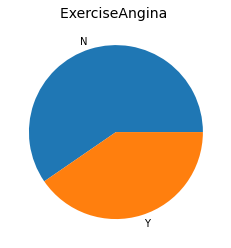

In [18]:
ExerciseAngina = data['ExerciseAngina'].value_counts()
plt.pie(ExerciseAngina, labels = ExerciseAngina.index);
plt.title("ExerciseAngina ", size = 14)

Text(0.5, 1.0, 'ST_slope')

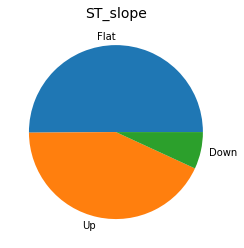

In [19]:
ExerciseAngina = data['ST_Slope'].value_counts()
plt.pie(ExerciseAngina, labels = ExerciseAngina.index);
plt.title("ST_slope", size = 14)

#### number of person with or without heart disease in each group (headmap representation)

In [20]:
pain_H = data.groupby(['ChestPainType','HeartDisease']).size()
pain_H

ChestPainType  HeartDisease
ASY            0               104
               1               392
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
dtype: int64

In [22]:
pain_H = pain_H.reset_index(name = 'count')
pain_H

,ChestPainType,HeartDisease,count
0,ASY,0,104
1,ASY,1,392
2,ATA,0,149
3,ATA,1,24
4,NAP,0,131
5,NAP,1,72
6,TA,0,26
7,TA,1,20


In [33]:
pain_H = pain_H.pivot(index = 'HeartDisease', columns = 'ChestPainType', values = 'count')
pain_H

ChestPainType,ASY,ATA,NAP,TA
HeartDisease,,,,
0,104,149,131,26
1,392,24,72,20


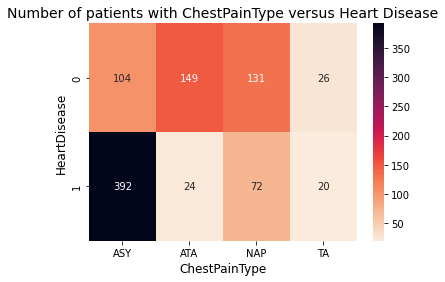

In [34]:
# ChestPainType vs HeartDisease :
pain_H = data.groupby(['ChestPainType','HeartDisease']).size()
pain_H = pain_H.reset_index(name = 'count')
pain_H = pain_H.pivot(index = 'HeartDisease', columns = 'ChestPainType', values = 'count')
sns.heatmap(pain_H, annot = True, fmt = 'd', cmap = 'rocket_r');
plt.xlabel("ChestPainType", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title ("Number of patients with ChestPainType versus Heart Disease", size = 14);

In [ ]:
#FastingBS vs HeartDisease 

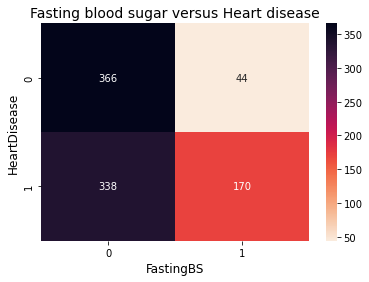

In [35]:
fasting = data.groupby(['FastingBS','HeartDisease']).size()
fasting = fasting.reset_index(name = 'count')
fasting = fasting.pivot(index = 'HeartDisease', columns = 'FastingBS', values = 'count')
sns.heatmap(fasting, annot = True, fmt = 'd',cmap = 'rocket_r');
plt.xlabel("FastingBS", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title ("Fasting blood sugar versus Heart disease", size = 14);

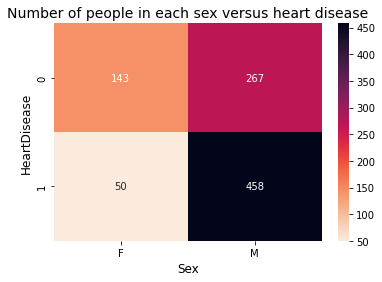

In [36]:
sex = data.groupby(['Sex','HeartDisease']).size()
sex = sex.reset_index(name = 'count')
sex = sex.pivot(index = 'HeartDisease', columns = 'Sex', values = 'count')
sns.heatmap(sex, annot = True, fmt = 'd', cmap = 'rocket_r');
plt.xlabel("Sex", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title ("Number of people in each sex versus heart disease", size = 14);

In [ ]:
# Male are more likely to have heart disease

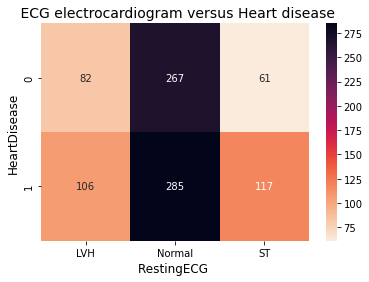

In [37]:
#  RestingECG vs HeartDisease
ECG = data.groupby(['RestingECG','HeartDisease']).size()
ECG = ECG.reset_index(name = 'count')
ECG = ECG.pivot(index = 'HeartDisease', columns = 'RestingECG', values = 'count')
sns.heatmap(ECG, annot = True, fmt = 'd',cmap = 'rocket_r');
plt.xlabel("RestingECG ", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title (" ECG electrocardiogram versus Heart disease", size = 14);

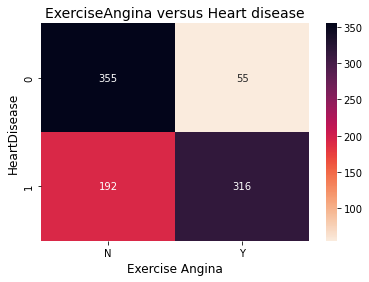

In [39]:
angina = data.groupby(['ExerciseAngina','HeartDisease']).size()
angina = angina.reset_index(name = 'count')
angina = angina.pivot(index = 'HeartDisease', columns = 'ExerciseAngina', values = 'count')
sns.heatmap(angina, annot = True, fmt = 'd',cmap = 'rocket_r');
plt.xlabel("Exercise Angina", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title ("ExerciseAngina versus Heart disease", size = 14);

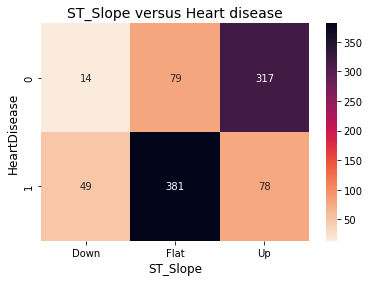

In [40]:
slop = data.groupby(['ST_Slope','HeartDisease']).size()
slop = slop.reset_index(name = 'count')
slop = slop.pivot(index = 'HeartDisease', columns = 'ST_Slope', values = 'count')
sns.heatmap(slop, annot = True, fmt = 'd',cmap = 'rocket_r');
plt.xlabel("ST_Slope", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title ("ST_Slope versus Heart disease", size = 14);

## quantitative analysis 

In [42]:
numerical = [f for f in numerical if data[f].nunique()>2]
numerical

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

the median value for the feature Age is 54.0


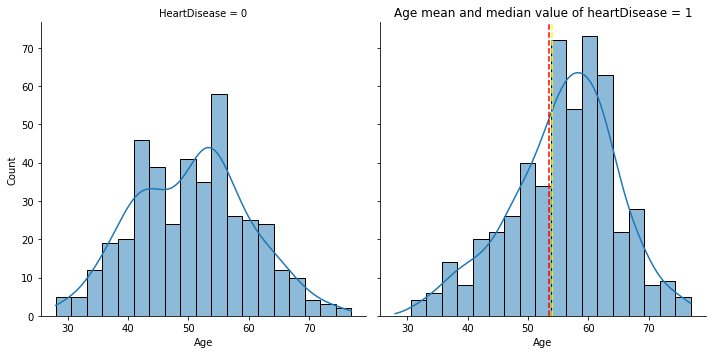

the median value for the feature RestingBP is 130.0


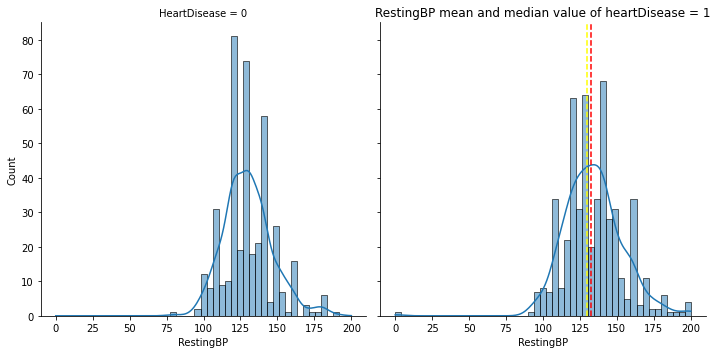

the median value for the feature Cholesterol is 223.0


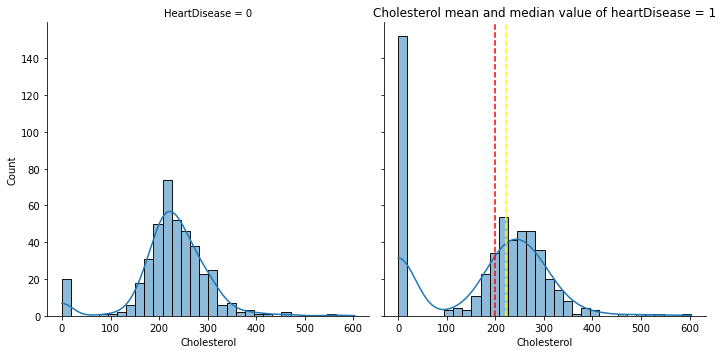

the median value for the feature MaxHR is 138.0


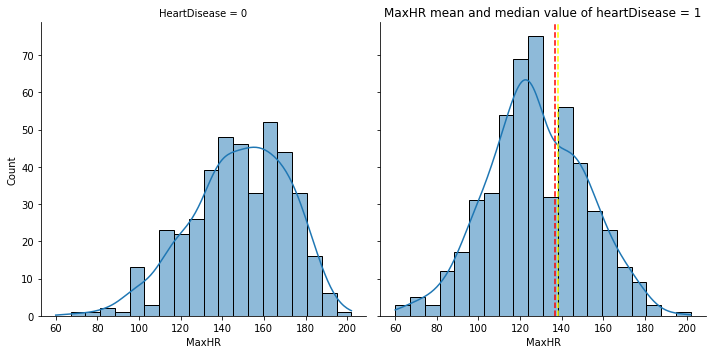

the median value for the feature Oldpeak is 0.6


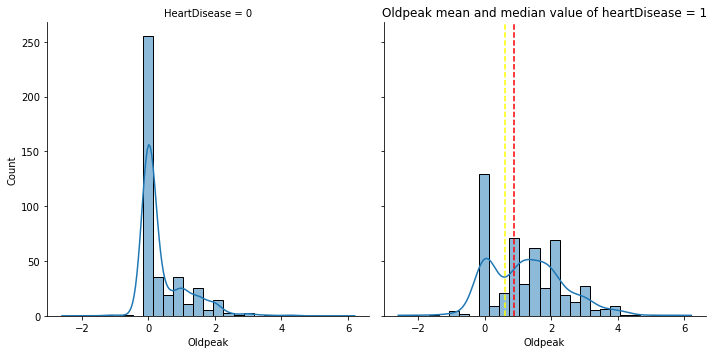

In [43]:
for f in numerical:
    sns.displot(x=data[f], col=data['HeartDisease'], kde=True )
    print('the median value for the feature '+f+' is',data[f].median())
    plt.axvline(data[f].mean(), linestyle = '--', color = "red")
    plt.axvline(data[f].median(), linestyle = '--', color = "yellow")
    plt.title(f+' mean and median value of heartDisease = 1')
    plt.show()

In [26]:
#sns.swarmplot(data=data,
#        x='Oldpeak',
#        y='HeartDisease',
#        hue='Sex')

#plt.show()

In [44]:
# mean age of people with heart disease
data[data['HeartDisease']== 1]['Age'].describe()

count    508.000000
mean      55.899606
std        8.727056
min       31.000000
25%       51.000000
50%       57.000000
75%       62.000000
max       77.000000
Name: Age, dtype: float64

In [45]:
data[data['HeartDisease']== 1]['RestingBP'].describe()

count    508.000000
mean     134.185039
std       19.828685
min        0.000000
25%      120.000000
50%      132.000000
75%      145.000000
max      200.000000
Name: RestingBP, dtype: float64

In [29]:
data[data['HeartDisease']== 1]['MaxHR'].describe()

count    508.000000
mean     127.655512
std       23.386923
min       60.000000
25%      112.000000
50%      126.000000
75%      144.250000
max      195.000000
Name: MaxHR, dtype: float64

In [47]:
numerical_discrete = ['FastingBS', 'HeartDisease']

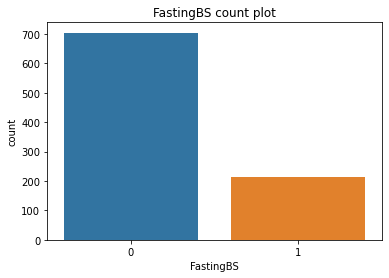

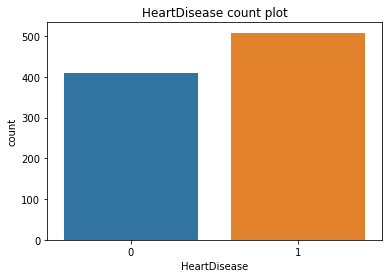

In [48]:
for f in numerical_discrete:
    sns.countplot(x=f,data=data)
    plt.title(f+' count plot')
    plt.show()

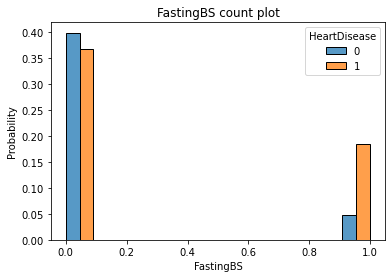

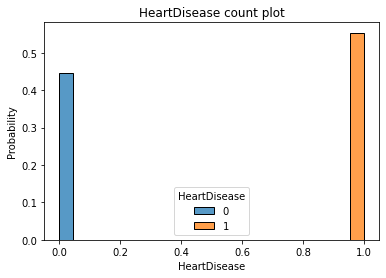

In [49]:
for f in numerical_discrete:
    sns.histplot(x=f, data=data, hue=data['HeartDisease'], stat="probability", multiple="dodge")
    #sns.countplot(x=f,data=data, hue=data['HeartDisease'])
    plt.title(f+' count plot')
    plt.show()

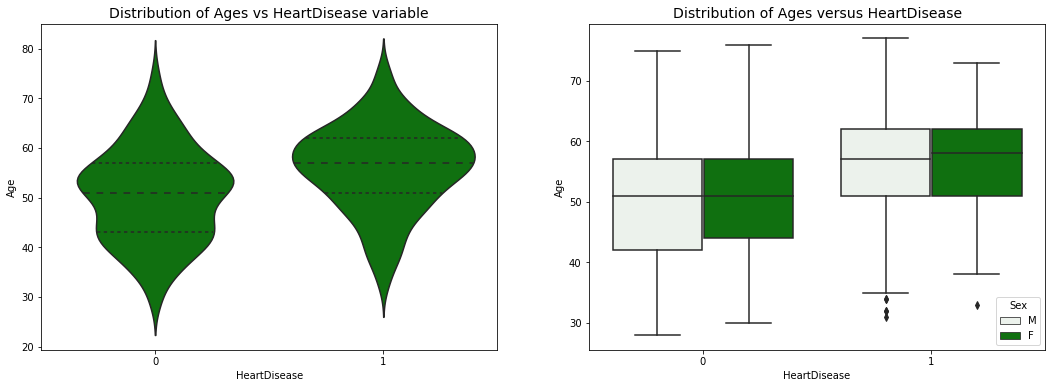

In [50]:
# Age VS. HeartDisease :
plt.figure(figsize = [18,6]);
plt.subplot(1,2,1);
sns.violinplot(data = data, x = 'HeartDisease', y = 'Age', color = 'green', inner = 'quartile');
plt.title("Distribution of Ages vs HeartDisease variable", size = 14);

plt.subplot(1,2,2);
sns.boxplot(data = data, x = 'HeartDisease', y = 'Age', color ='green', hue= 'Sex');
plt.title("Distribution of Ages versus HeartDisease", size = 14);

#the average age of people who have heart disease is slightly higher than healthy people

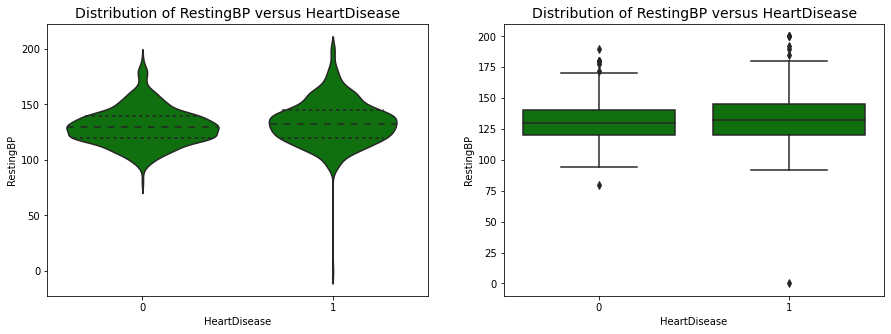

In [51]:
# RestingBP vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sns.violinplot(data = data, x = 'HeartDisease', y = 'RestingBP', color = 'green', inner = 'quartile');
plt.title("Distribution of RestingBP versus HeartDisease", size = 14);

plt.subplot(1,2,2);
sns.boxplot(data = data, x = 'HeartDisease', y = 'RestingBP', color = 'green');
plt.title("Distribution of RestingBP versus HeartDisease", size = 14);

#the distribution of Resting Blood Pressure seemed to be similar in both healty or with heart disease

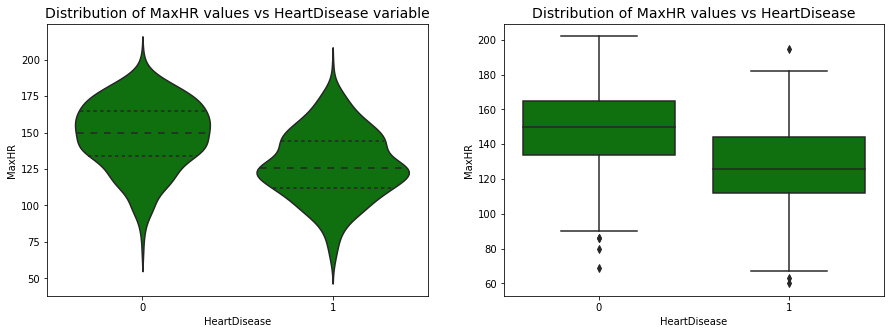

In [52]:
# MaxHR vs HeartDisease : 
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sns.violinplot(data = data, x = 'HeartDisease', y = 'MaxHR', color = 'green', inner = 'quartile');
plt.title("Distribution of MaxHR values vs HeartDisease variable", size = 14);

plt.subplot(1,2,2);
sns.boxplot(data = data, x = 'HeartDisease', y = 'MaxHR', color = 'green');
plt.title("Distribution of MaxHR values vs HeartDisease", size = 14);

#average value of MaxHR for sick people lower than that for healthy

In [ ]:
# Cholesterol vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sns.violinplot(data = data, x = 'HeartDisease', y = 'Cholesterol', color = 'green', inner = 'quartile');
plt.title("Distribution of Cholesterol values versus HeartDisease", size = 14);

plt.subplot(1,2,2);
sns.boxplot(data = data, x = 'HeartDisease', y = 'Cholesterol', hue='Sex', color = 'green');
plt.title("Distribution of Cholesterol values versus HeartDisease ", size = 14);

In [ ]:
data['Oldpeak'].unique()

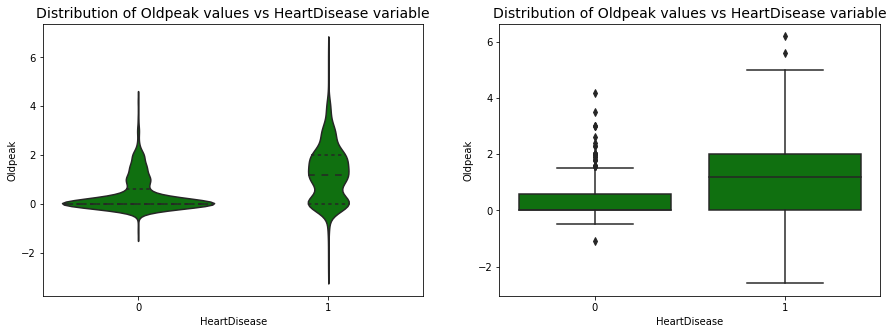

In [56]:
# Oldpeak vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sns.violinplot(data = data, x = 'HeartDisease', y = 'Oldpeak', color = 'green', inner = 'quartile');
plt.title("Distribution of Oldpeak values vs HeartDisease variable", size = 14);

plt.subplot(1,2,2);
sns.boxplot(data = data, x = 'HeartDisease', y = 'Oldpeak', color = 'green');
plt.title("Distribution of Oldpeak values vs HeartDisease variable", size = 14);

most of Oldpeak Values for healthy confined between 0 and 0.3 

broadness of distribution of Oldpeak for sick people, 

<AxesSubplot:>

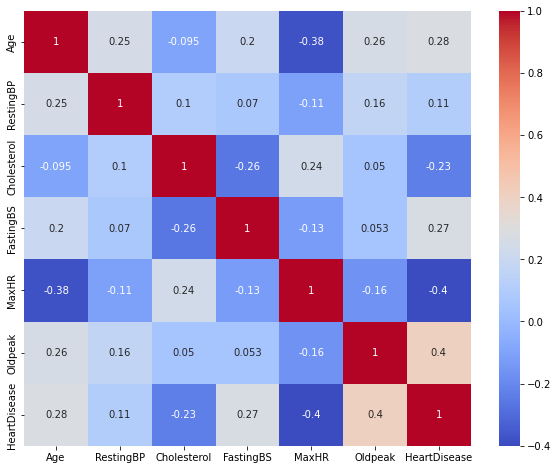

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True,cmap="coolwarm")

In [ ]:
# does ages 

In [ ]:
non_numerical

<AxesSubplot:xlabel='Sex', ylabel='Age'>

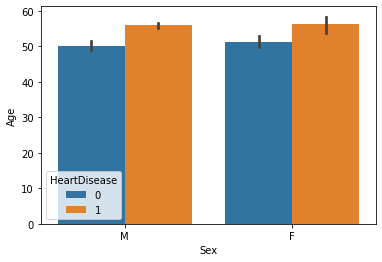

In [58]:
# is age-related to a high risk of having heart disease?
sns.barplot(x="Sex",y="Age",data=data,hue="HeartDisease")

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

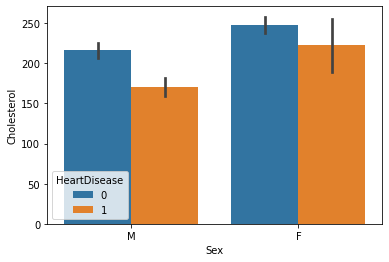

In [59]:
# is the level of cholesterol  and the sex are related to a high risk of having heart disease?
sns.barplot(x="Sex",y="Cholesterol",data=data,hue="HeartDisease")

<AxesSubplot:xlabel='Sex', ylabel='FastingBS'>

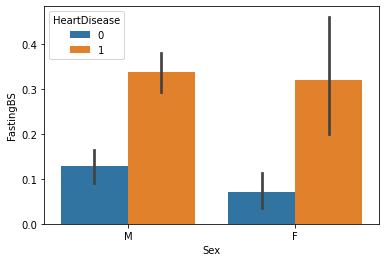

In [60]:
#FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise
sns.barplot(x="Sex",y="FastingBS",data=data,hue="HeartDisease")

<AxesSubplot:xlabel='Sex', ylabel='RestingBP'>

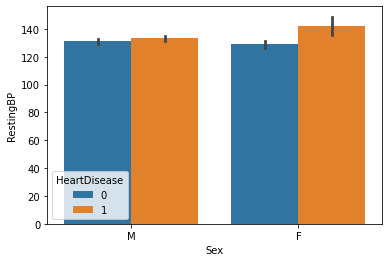

In [61]:
#RestingBP: resting blood pressure [mm Hg]
sns.barplot(x="Sex",y="RestingBP",data=data,hue="HeartDisease")

In [62]:
#RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
#LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
data["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

<AxesSubplot:xlabel='RestingECG', ylabel='Age'>

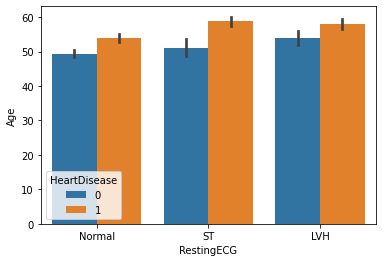

In [63]:
# is age-related to a high risk of having heart disease?
sns.barplot(x="RestingECG",y="Age",data=data,hue="HeartDisease")

In [ ]:
numerical

# Modeling 

In [65]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:xlabel='variable', ylabel='value'>

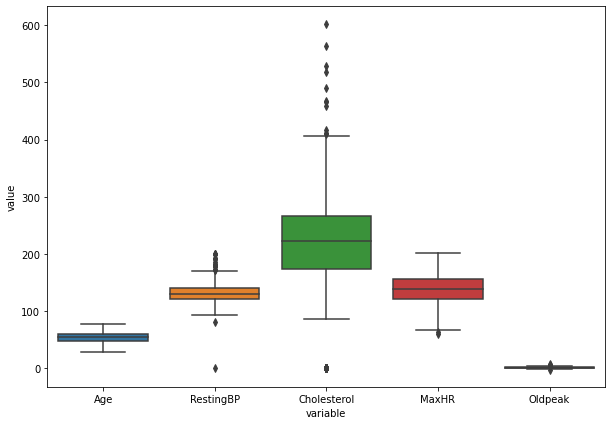

In [66]:
#melt data frame into long format
plt.figure(figsize=(10, 7))
data_melted = pd.melt(data[numerical])
#view first 10 rows of melted data frame
#df_melted.head(10)
#create seaborn boxplots by group
sns.boxplot(x='variable', y='value', data=data_melted)

### outliers treatment using IQR

In [ ]:
numerical

In [67]:
df=data.copy()

In [68]:
for column in numerical:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+ 1.5*IQR
    lower=Q1- 1.5*IQR
    df=df[(df[column]>lower) & (df[column]<upper)]

<AxesSubplot:xlabel='variable', ylabel='value'>

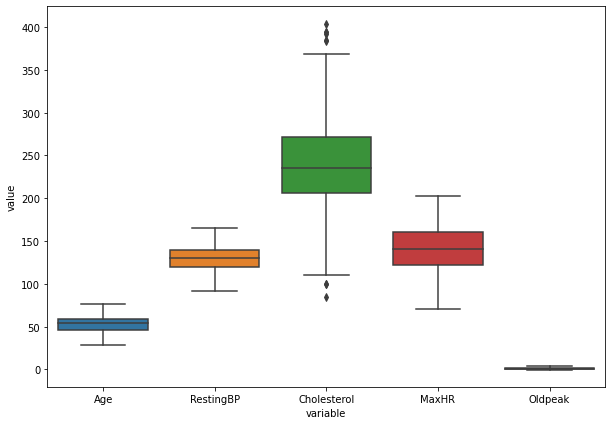

In [69]:
#melt data frame into long format
plt.figure(figsize=(10, 7))
df_melted = pd.melt(df[numerical])
sns.boxplot(x='variable', y='value', data=df_melted)

In [ ]:
#for column in numerical:
#    sns.boxplot(df[column])
#    plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'RestingBP'),
  Text(2.5, 0, 'Cholesterol'),
  Text(3.5, 0, 'FastingBS'),
  Text(4.5, 0, 'MaxHR'),
  Text(5.5, 0, 'Oldpeak'),
  Text(6.5, 0, 'HeartDisease')])

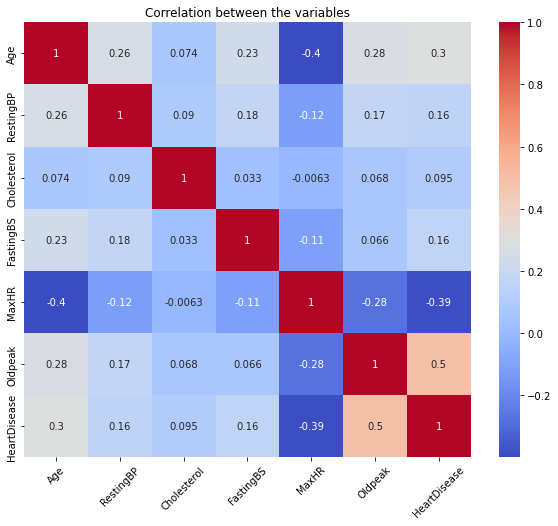

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

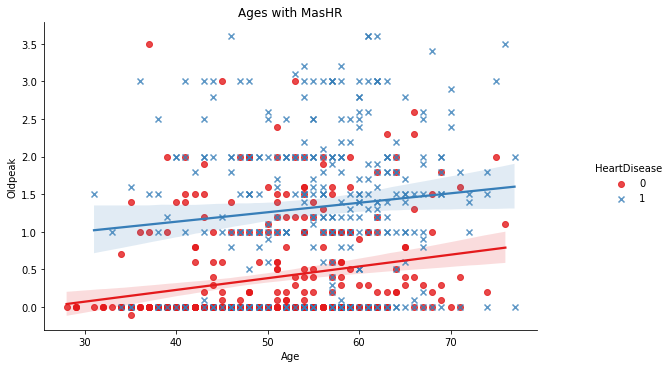

In [71]:
g= sns.lmplot(x="Age", y="Oldpeak", 
           data=df, hue="HeartDisease", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Ages with MasHR')
plt.show()

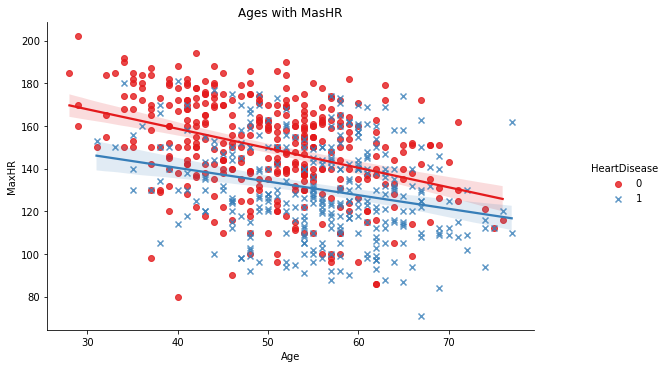

In [72]:
g= sns.lmplot(x="Age", y="MaxHR", 
           data=df, hue="HeartDisease", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Ages with MasHR')
plt.show()

###  Data Preprocessing

In [ ]:
non_numerical

In [73]:
# encode non numerical features
lb=LabelEncoder()
df[non_numerical] = df[non_numerical].apply(lambda col: lb.fit_transform(col))

In [74]:
# get the predictors
X=df.drop('HeartDisease',axis=1)
X.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1


In [75]:
# get the target feature
y=df['HeartDisease']
y.head(3)

0    0
1    1
2    0
Name: HeartDisease, dtype: int64

In [77]:
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=47)

###  KNN model

In [78]:
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [79]:
y_pred=knn.predict(X_test)

In [80]:
knn.score(X_test,y_test)

0.6589595375722543

In [81]:
metrics.accuracy_score(y_test,y_pred)

0.6589595375722543

In [82]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[67, 36],
       [23, 47]], dtype=int64)

In [83]:
target_names = ['Heart Diseases', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Heart Diseases       0.74      0.65      0.69       103
        Normal       0.57      0.67      0.61        70

      accuracy                           0.66       173
     macro avg       0.66      0.66      0.65       173
  weighted avg       0.67      0.66      0.66       173



#### 2nd KNN model , hyperparam tuning with Gridsearch 

In [84]:
k_range = list(range(2, 20))
param_grid = dict(n_neighbors=k_range)

knn_2=KNeighborsClassifier()
grid = GridSearchCV(knn_2, param_grid, cv=10)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [85]:
print(grid_search.best_params_)

{'n_neighbors': 13}


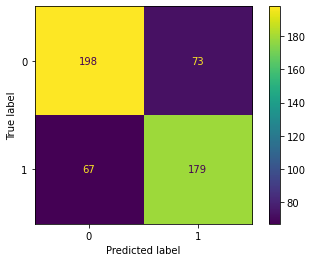

In [86]:
plot_confusion_matrix(grid,X_train, y_train,values_format='d' )

In [87]:
knn3=KNeighborsClassifier(n_neighbors=13)
knn3.fit(X_train,y_train)
y_pred=knn3.predict(X_test)

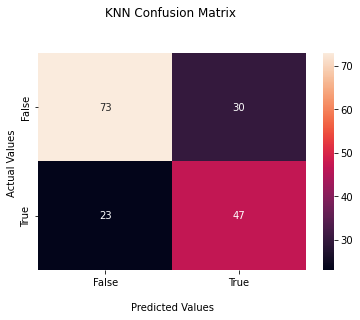

In [88]:
ax=sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
ax.set_title('KNN Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [89]:
knn3.score(X_test,y_test)

0.6936416184971098

In [90]:
metrics.accuracy_score(y_test,y_pred)

0.6936416184971098

In [91]:
target_names = ['Heart Diseases', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Heart Diseases       0.76      0.71      0.73       103
        Normal       0.61      0.67      0.64        70

      accuracy                           0.69       173
     macro avg       0.69      0.69      0.69       173
  weighted avg       0.70      0.69      0.70       173



In [92]:
# Exam result of mom 
Exam = [{'Age': 70, 'Sex': 0, 'ChestPainType':3, 'RestingBP':165, 'Cholesterol':395, 'FastingBS':1,
       'RestingECG': 2, 'MaxHR': 192, 'ExerciseAngina':1, 'Oldpeak':3.3, 'ST_Slope':2}]
exam = pd.DataFrame(Exam)
mom_pred = knn3.predict(exam)
mom_pred

array([0], dtype=int64)

### random forest 

In [93]:
# define hyperparams
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8, 10]
min_samples_split = [2,3, 4, 5]
min_samples_leaf = [1,2, 3]
bootstrap = [True, False]

In [94]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 14, 19, 24, 28, 33, 38, 43, 47, 52, 57, 62, 66, 71, 76, 81, 85, 90, 95, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [95]:
rf_Model = RandomForestClassifier()

In [96]:
# n_jobs -1, all CPUs are used.
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1)

In [97]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 14, 19, 24, 28, 33,
                                                         38, 43, 47, 52, 57, 62,
                                                         66, 71, 76, 81, 85, 90,
                                                         95, 100]},
                   verbose=2)

In [98]:
rf_RandomGrid.best_params_

{'n_estimators': 76,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': False}

In [99]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.983
Test Accuracy - : 0.821


In [100]:
RF =rf_RandomGrid.best_params_

In [101]:
rfOpt = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf=2, max_features= 'auto', max_depth= 10,bootstrap=True)

In [102]:
rfOpt = rfOpt.fit(X_train, y_train)
y_pred = rfOpt.predict(X_test)

In [103]:
target_names = ['Heart Diseases', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Heart Diseases       0.89      0.83      0.85       103
        Normal       0.77      0.84      0.80        70

      accuracy                           0.83       173
     macro avg       0.83      0.83      0.83       173
  weighted avg       0.84      0.83      0.83       173



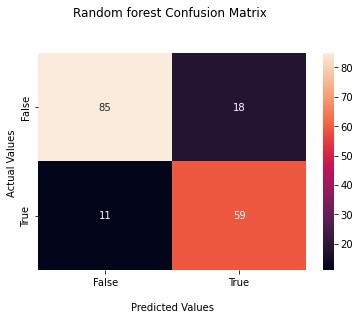

In [104]:
ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
ax.set_title('Random forest Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
#Feature importance based on mean decrease in impurity

In [105]:
importances = rfOpt.feature_importances_
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = [f"feature {i}" for i in X.columns]
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
std = np.std([tree.feature_importances_ for tree in  rfOpt.estimators_], axis=0)

In [106]:
forest_importances

feature ST_Slope          0.267542
feature Oldpeak           0.137379
feature ChestPainType     0.119932
feature MaxHR             0.107066
feature ExerciseAngina    0.089409
feature Age               0.074560
feature RestingBP         0.067076
feature Cholesterol       0.059223
feature Sex               0.031712
feature RestingECG        0.030729
feature FastingBS         0.015372
dtype: float64

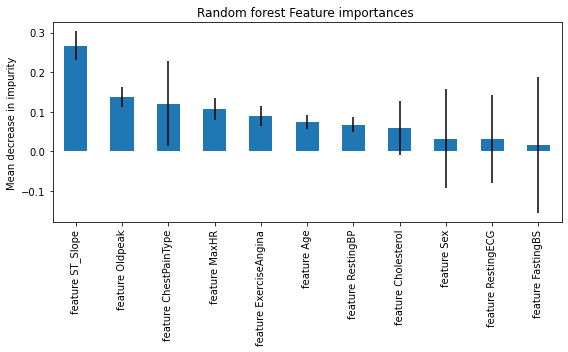

In [107]:
fig, ax = plt.subplots(figsize=(8,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Random forest Feature importances ")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [108]:
# Exam result of mom 
Exam = [{'Age': 70, 'Sex': 0, 'ChestPainType':3, 'RestingBP':165, 'Cholesterol':395, 'FastingBS':1,
       'RestingECG': 2, 'MaxHR': 192, 'ExerciseAngina':1, 'Oldpeak':3.3, 'ST_Slope':2}]
exam = pd.DataFrame(Exam)
mom_pred = rfOpt.predict(exam)
mom_pred

array([0], dtype=int64)

### XGBoost Model

In [109]:
# XGBOOST Model - 1rst model 

model = XGBClassifier(n_estimators=1000,learning_rate=0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) #predictions
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\mirei\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:22:06] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 80.35%


In [110]:
# XGBOOST Model - 2nd model 
xgbb = XGBClassifier()
xgbb= XGBClassifier(n_estimators=1000,learning_rate=0.05,use_label_encoder=False )
xgbb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

[02:22:09] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [111]:
xgbb=XGBClassifier(n_estimators = xgbb.best_iteration)
xgbb.fit(X_train, y_train)

[02:22:10] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mirei\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=41, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
xgbb.score(X_test,y_test)

0.8208092485549133

[02:22:14] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mirei\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

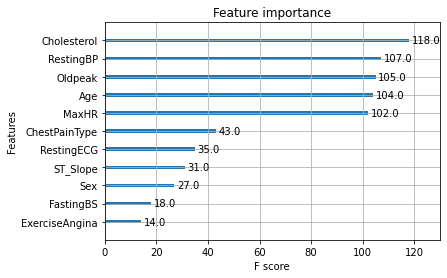

In [113]:
plot_importance(xgbb.fit(X_train,y_train))

In [114]:
print(xgbb.score(X_train,y_train))
print(xgbb.score(X_test,y_test))

0.9980657640232108
0.8208092485549133


In [115]:
y_pred = xgbb.predict(X_test)
target_names = ['Heart Diseases', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Heart Diseases       0.88      0.82      0.84       103
        Normal       0.75      0.83      0.79        70

      accuracy                           0.82       173
     macro avg       0.81      0.82      0.82       173
  weighted avg       0.83      0.82      0.82       173



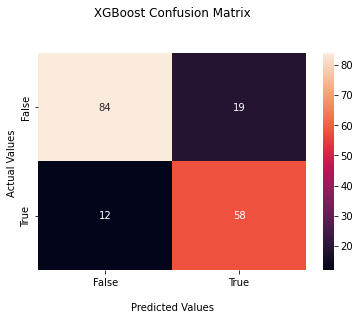

In [116]:
ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
ax.set_title(' XGBoost Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [117]:
# Exam result of mom 
Exam = [{'Age': 70, 'Sex': 0, 'ChestPainType':3, 'RestingBP':165, 'Cholesterol':395, 'FastingBS':1,
       'RestingECG': 2, 'MaxHR': 192, 'ExerciseAngina':1, 'Oldpeak':3.3, 'ST_Slope':2}]
exam = pd.DataFrame(Exam)
mom_pred = xgbb.predict(exam)
mom_pred

array([0], dtype=int64)

In [118]:
# Exam result of the father 
Exam2 = [{'Age': 75 , 'Sex': 1, 'ChestPainType':0, 'RestingBP':1, 'Cholesterol':225, 'FastingBS':0,
       'RestingECG': 0, 'MaxHR': 135, 'ExerciseAngina':1, 'Oldpeak':0.1, 'ST_Slope':1}]
exam2 = pd.DataFrame(Exam2)
mom_pred2 = xgbb.predict(exam2)
mom_pred2

array([1], dtype=int64)

## XGBoost two

In [119]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [120]:
parameters = {
    'max_depth': [int(x) for x in np.linspace(start = 5, stop = 20, num = 10)],
    'n_estimators':[int(x) for x in np.linspace(start = 10, stop = 100, num = 20)],
    'learning_rate': [0.1, 0.01, 0.05]
}

In [121]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [122]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[02:24:14] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mirei\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                                     validate_parameter

In [123]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=43, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [124]:
xgb_grid = grid_search.best_estimator_

In [125]:
grid_search.best_score_

0.9234138007054675

In [126]:
xgb_grid.score(X_test,y_test)

0.791907514450867

In [127]:
y_pred = xgb_grid.predict(X_test)

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       103
           1       0.73      0.77      0.75        70

    accuracy                           0.79       173
   macro avg       0.78      0.79      0.79       173
weighted avg       0.79      0.79      0.79       173



In [129]:
# Exam result of mom 
Exam = [{'Age': 70, 'Sex': 0, 'ChestPainType':3, 'RestingBP':165, 'Cholesterol':395, 'FastingBS':1,
       'RestingECG': 2, 'MaxHR': 192, 'ExerciseAngina':1, 'Oldpeak':3.3, 'ST_Slope':2}]
exam = pd.DataFrame(Exam)
mom_pred = xgb_grid.predict(exam)
mom_pred

array([0], dtype=int64)

In [ ]:
#The Best Model 